# Exercise 4.10 Coding Etiquette & Excel Reporting_Part 1 /3

1. Import libraries
2. Handling PII/Data Privacy
3. Regional segmentation of the data
4. Excluding low-activity customers
5. Customer profiling

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#Import Dataset
path=r'C:\Users\north\08-2024 Instacart Basket Analysis'
df_final=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'custords_merge_final.pkl'))


###**Other visualizations**

In [11]:
df_final.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'num_dependents',
       'family_status', 'income', 'order_id', 'order_number', 'order_weekday',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'merge_flag', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'user_spending',
       'spending_flag', 'order_frequency', 'frequency_flag', 'region',
       'exclusion_flag', 'customer_profile', 'age_group', 'income_group',
       'dependents_category'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

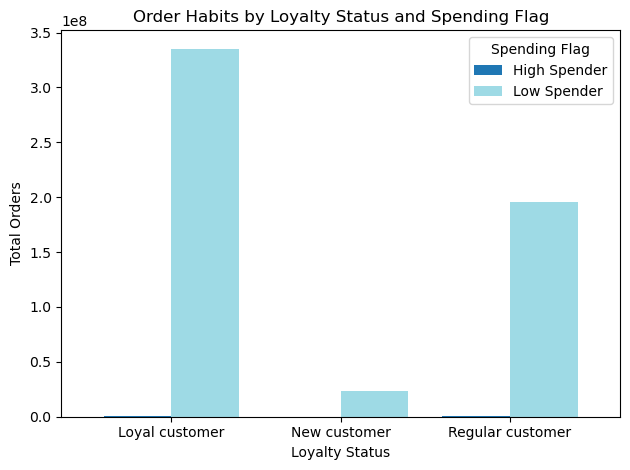

In [47]:
# Grouping data by 'loyalty_flag' and summing up 'order_number' (or another metric)
loyalty_order_habits = df_final.groupby(['loyalty_flag', 'spending_flag'])['order_number'].sum().unstack()

# Creating a grouped bar chart
plt.figure(figsize=(8, 6))
loyalty_order_habits.plot(kind='bar', colormap='tab20', width=0.8)

# Adding title and labels
plt.title('Order Habits by Loyalty Status and Spending Flag')
plt.xlabel('Loyalty Status')
plt.ylabel('Total Orders')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Adding legend with the spending categories
plt.legend(title='Spending Flag')

# Adjusting layout for readability
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_spending_by_type_of_customer.png'))

# Display the plot
plt.show()



In [15]:
#Creating Crosstab for Weekday Order placement by Region
week_day_category_region_comparison=pd.crosstab(df_final['order_weekday'],df_final['region'],dropna=False)

In [17]:
week_day_category_region_comparison

region,Midwest,Northeast,South,West
order_weekday,,,,
0,1460186,1097258,2052776,1593962
1,1320759,999953,1892057,1447461
2,991770,746153,1404662,1071245
3,895093,679308,1287335,978798
4,888131,666326,1258537,970808
5,983262,746455,1399737,1076337
6,1058124,787283,1496781,1154302


In [19]:
# Create a mapping dictionary for the days
day_mapping = {0: 'weekend', 1: 'weekend', 2: 'weekday', 3: 'weekday', 4: 'weekday', 5: 'weekday', 6: 'weekday'}

# Map the 'order_weekday' column to the new 'day_category' column
df_final['day_category'] = df_final['order_weekday'].map(day_mapping)

#create the crosstab with the new 'day_category' column
week_day_category_region_comparison = pd.crosstab(df_final['day_category'], df_final['region'], dropna=False)

print(week_day_category_region_comparison)


region        Midwest  Northeast    South     West
day_category                                      
weekday       4816380    3625525  6847052  5251490
weekend       2780945    2097211  3944833  3041423


<Figure size 1000x700 with 0 Axes>

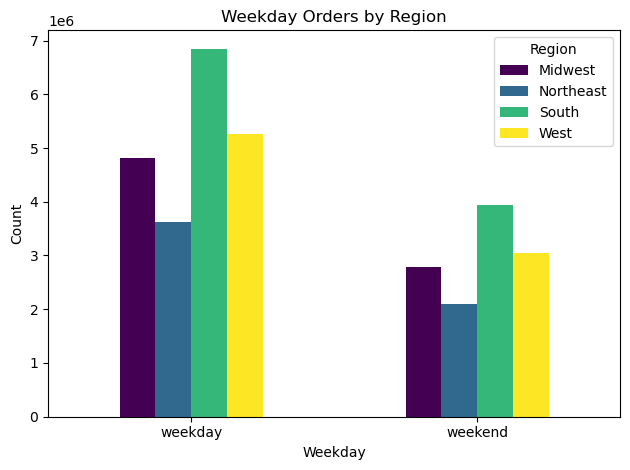

In [39]:

# Create the figure first
plt.figure(figsize=(10, 7))

week_day_category_region_comparison.plot(kind='bar', colormap='viridis', rot=0)

# Add title and labels
plt.title('Weekday Orders by Region')
plt.xlabel('Weekday')
plt.ylabel('Count')

# Add a legend with a title
plt.legend(title='Region')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'weekday_orders_by_region.png'))

# Show the plot
plt.show()


In [56]:
# Creating crosstab to compare age_group profile with customer frequency type
age_customer_frequency_comparison=pd.crosstab(df_final['age_group'],df_final['frequency_flag'])

In [58]:
age_customer_frequency_comparison

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Senior,7376677,1241537,2449036
Single Adult,2388889,398783,785329
Young Parent,5367570,903107,1826368
other,6426717,1093010,2147831


<Figure size 1000x700 with 0 Axes>

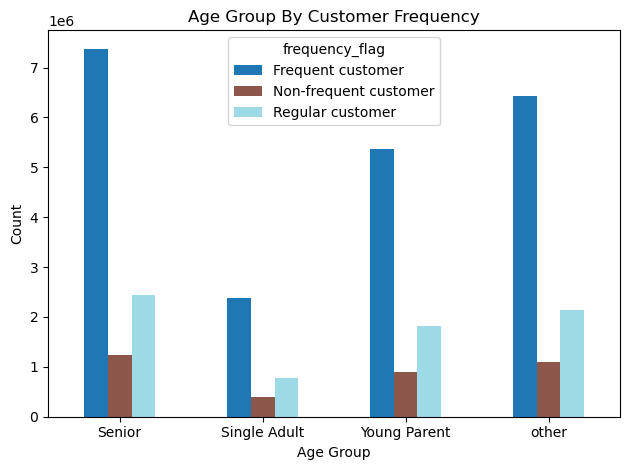

In [60]:
# Creating Bar Chart for age_group By customer frequency Comparison
plt.figure(figsize=(10, 7))
age_customer_frequency_comparison.plot(kind='bar', colormap='tab20', rot=0)
plt.title('Age Group By Customer Frequency')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_customer_frequency.png'))

plt.show()

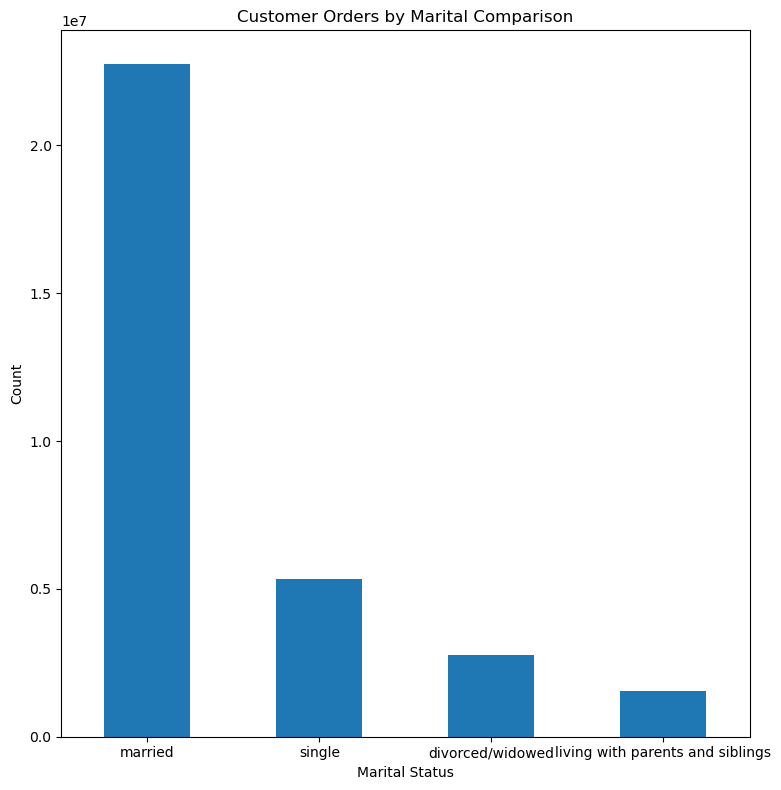

In [70]:
# Creating bar chart for customer marital status breakdown
plt.figure(figsize=(8,8))
marital_status_comparison_bar= df_final['family_status'].value_counts().plot(kind='bar', colormap='tab20', rot=0)
plt.title('Customer Orders by Marital Comparison')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_order_marital.png'))
plt.show()

In [72]:
# Creating Crosstab Bewtween age_group and loyalty_flag
age_group_loyalty_comparison=pd.crosstab(df_final['age_group'],df_final['loyalty_flag'],dropna=False)

In [73]:
age_group_loyalty_comparison

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
Senior,3514773,2142726,5409756
Single Adult,1143582,684884,1744535
Young Parent,2530577,1551274,4015194
other,3095161,1865106,4707291


<Figure size 1000x700 with 0 Axes>

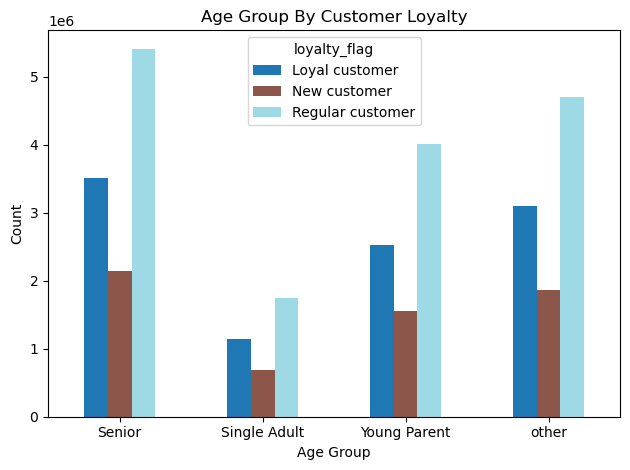

In [76]:
# Creating Bar Chart for age_group By customer loyalty
plt.figure(figsize=(10, 7))
age_group_loaylty_comparison_bar= age_group_loyalty_comparison.plot(kind='bar',colormap='tab20', rot=0)
plt.title('Age Group By Customer Loyalty')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'agegroup_loyalty'))
plt.show()